# 패키지 import

In [1]:
import numpy as np # 벡터, 행렬 등 수치 연산을 수행하는 선형대수 라이브러리
import pandas as pd # 시리즈, 데이터프레임 포맷 데이터 처리를 위한 라이브러리

import warnings; warnings.filterwarnings(action='ignore') # 경고 메시지 무시

import matplotlib.pyplot as plt # 데이터 시각화 라이브러리
import seaborn as sns

import pickle # 객체 입출력을 위한 라이브러리

from sklearn.model_selection import train_test_split # 훈련 데이터, 테스트 데이터 분리
from sklearn.preprocessing import StandardScaler # 정규화
from sklearn.ensemble import RandomForestClassifier as RFC # 랜덤포레스트 분류 알고리즘
from sklearn.tree import DecisionTreeClassifier as DTC # 의사결정나무 분류 알고리즘
from sklearn.ensemble import GradientBoostingClassifier as GBC # 그래디언트 부스팅 분류 알고리즘
from math import sqrt
# 모델 평가를 위한 metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, mean_squared_error, plot_confusion_matrix, classification_report

# from sklearn.preprocessing import RobustScaler # 정규화
# from sklearn.metrics import roc_curve
# from sklearn.metrics import mean_squared_error
# from sklearn.metrics import classification_report

In [2]:
X_data = pd.read_csv(r'C:\localRepository\Bigdata_busan\ML\res\prepro.csv', index_col=0)
X_data.head()

,Lot,pH,Temp,Voltage,DTime
Time,,,,,
2021-09-06 16:29:54.000,1,2.15,43.15,19.74,2021-09-06
2021-09-06 16:29:59.000,1,2.08,40.13,18.01,2021-09-06
2021-09-06 16:30:04.000,1,2.18,43.46,18.73,2021-09-06
2021-09-06 16:30:09.000,1,1.99,41.72,16.75,2021-09-06
2021-09-06 16:30:14.000,1,1.85,43.65,18.02,2021-09-06


In [2]:
X_data = pd.read_csv(r'C:\localRepository\Bigdata_busan\ML\res\final_df.csv', index_col=0)
X_data.head()

,QC,Voltage,pH,Temp
2021-09-06 16:29:54.000,1,19.74,2.15,43.15
2021-09-06 16:29:59.000,1,18.01,2.08,40.13
2021-09-06 16:30:04.000,1,18.73,2.18,43.46
2021-09-06 16:30:09.000,1,16.75,1.99,41.72
2021-09-06 16:30:14.000,1,18.02,1.85,43.65


In [3]:
X_data.shape

(50094, 4)

# 독립변수별 종속변수 간의 관계 시각화

- 어떤 독립변수가 정상/불량 결정짓는 주요 영향인자인지 그래프로 시각화

In [4]:
# 정상 데이터 모음
data_1 = X_data[(X_data['QC']==1)]
data_1

,QC,Voltage,pH,Temp
2021-09-06 16:29:54.000,1,19.74,2.15,43.15
2021-09-06 16:29:59.000,1,18.01,2.08,40.13
2021-09-06 16:30:04.000,1,18.73,2.18,43.46
2021-09-06 16:30:09.000,1,16.75,1.99,41.72
2021-09-06 16:30:14.000,1,18.02,1.85,43.65
...,...,...,...,...
2021-10-27 18:36:03.300,1,15.38,2.05,42.84
2021-10-27 18:36:08.300,1,19.08,1.91,42.64
2021-10-27 18:36:13.300,1,18.14,2.11,44.09
2021-10-27 18:36:18.300,1,17.96,1.92,43.95


In [5]:
# 불량 데이터 모음
data_0 = X_data[(X_data['QC']==0)]
data_0

,QC,Voltage,pH,Temp
2021-09-08 18:23:01.700,0,15.53,1.97,41.20
2021-09-08 18:23:06.700,0,16.86,2.08,42.13
2021-09-08 18:23:11.700,0,18.19,1.89,44.62
2021-09-08 18:23:16.700,0,15.59,1.95,42.55
2021-09-08 18:23:21.700,0,15.44,2.43,44.54
...,...,...,...,...
2021-10-25 18:00:47.800,0,17.21,1.88,41.14
2021-10-25 18:00:52.800,0,18.32,2.04,44.78
2021-10-25 18:00:57.800,0,16.19,2.48,41.44
2021-10-25 18:01:02.800,0,19.30,1.81,41.09


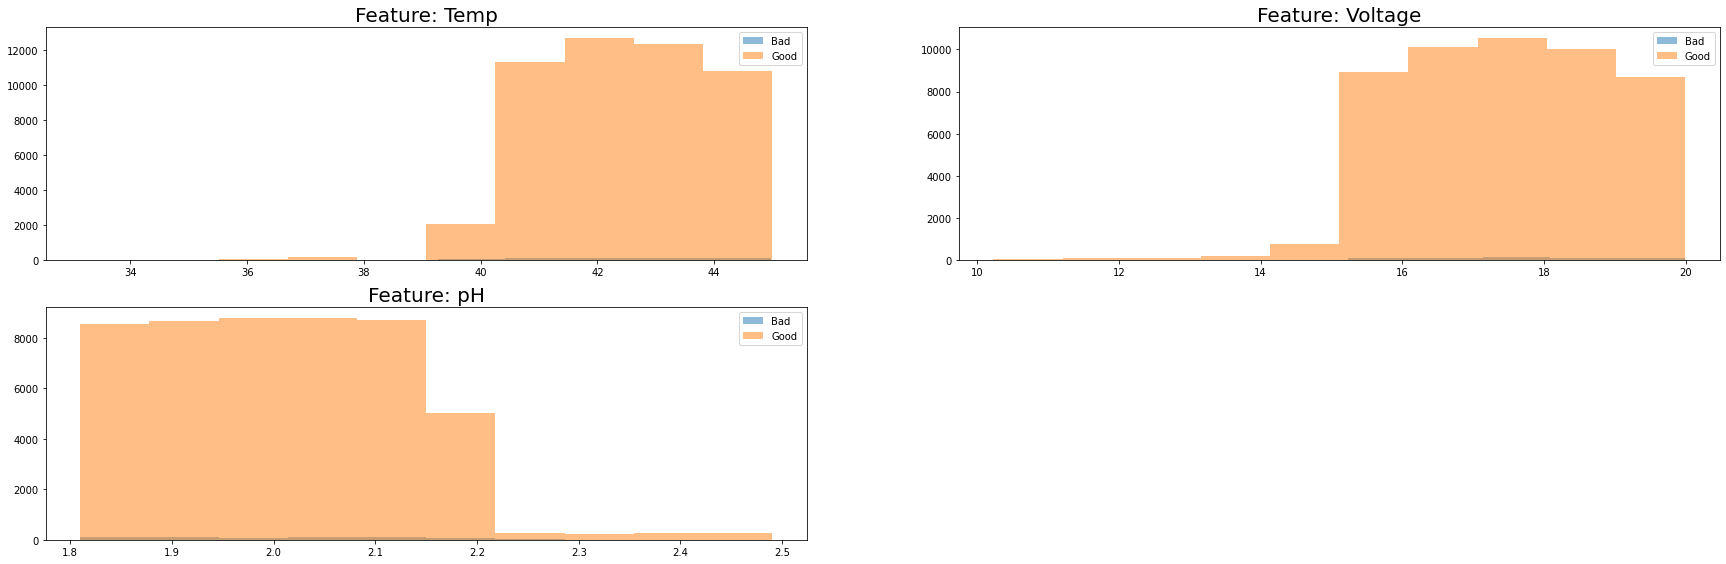

In [6]:
# 독립변수 설정
x = X_data[X_data.columns.difference(['QC'])]
# 독립변수명 리스트
feature_name = x.columns
plt.figure(figsize=(30,30))
for col_idx in range(len(feature_name)):
    # 6행 2열 서브플롯에 각 feature 박스플롯 시각화
    # subplot(행, 열, 어디에 그릴지)
    plt.subplot(6, 2, col_idx+1)
    # 불량에 해당하는 데이터 histogram 시각화
    # alpha : 투명도
    plt.hist(X_data[X_data['QC'] == 0][feature_name[col_idx]], label = "Bad", alpha =0.5)
    # 정상에 해당하는 데이터 histogram 시각화
    plt.hist(X_data[X_data['QC'] == 1][feature_name[col_idx]], label = "Good", alpha =0.5)
    plt.legend()
    plt.title("Feature: "+ feature_name[col_idx], fontsize = 20)
plt.show()
# 시각적으로 미세한 차이가 보인다 -> 특성중요도 확인 필요

# Train/ Validation/ Test Data Set Make

In [7]:
# train
train_np = X_data[['Temp', 'Voltage', 'pH']].to_numpy()
train_np

array([[43.15, 19.74,  2.15],
       [40.13, 18.01,  2.08],
       [43.46, 18.73,  2.18],
       ...,
       [44.09, 18.14,  2.11],
       [43.95, 17.96,  1.92],
       [44.11, 19.22,  1.81]])

In [8]:
# target
target_np = X_data['QC'].to_numpy()
target_np

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [9]:
# 학습용/검증용/테스트용 데이터 생성(60:20:20)
# 1. 학습, 테스트 80:20 으로 나눔
train_input, test_input, train_target, test_target = train_test_split(train_np, target_np, random_state=42, test_size=0.2)

In [10]:
# 2. 학습 -> 학습, 검증 75:25 로 나눔
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, random_state=42, test_size=0.25)

In [11]:
train_input.shape

(30056, 3)

In [12]:
test_input.shape

(10019, 3)

In [13]:
val_input.shape

(10019, 3)

# 모델링

In [14]:
# 정규화
scaler = StandardScaler()
train_input = scaler.fit_transform(train_input)
val_input = scaler.transform(val_input)
test_input = scaler.transform(test_input)

In [15]:
# Random Forest 모델 학습
model_1 = RFC(random_state=42,)
clf = model_1.fit(train_input, train_target)

In [16]:
clf

RandomForestClassifier(random_state=42)

In [17]:
# 훈련 정확도
clf.score(train_input, train_target)

0.9999001863188715

In [18]:
# 검증 정확도
clf.score(val_input, val_target)

0.9877233256812057

# 모델 평가

In [ ]:
clf_pred = clf.predict(test_input)
print('Random Forest Model Predict : ', clf_pred)
rmse = sqrt(mean_squared_error(test_target, clf_pred))
print('Random Forest Model RMSE : ', rmse)


Random Forest Model Predict :  [1 1 1 ... 1 1 1]
Random Forest Model RMSE :  0.11347042117083507


In [ ]:
# 테스트 정확도
accuracy_score(test_target, clf_pred)

0.9871244635193133

In [ ]:
print(classification_report(test_target, clf_pred, target_names=['class 0', 'class 1']))

              precision    recall  f1-score   support

     class 0       0.50      0.01      0.02       129
     class 1       0.99      1.00      0.99      9890

    accuracy                           0.99     10019
   macro avg       0.74      0.50      0.50     10019
weighted avg       0.98      0.99      0.98     10019



In [ ]:
# Feature Importance 확인
feature_scores = pd.Series(clf.feature_importances_, index=['Temp','Voltage','pH']).sort_values(ascending=True)
feature_scores

pH         0.173130
Voltage    0.395599
Temp       0.431271
dtype: float64

<AxesSubplot:>

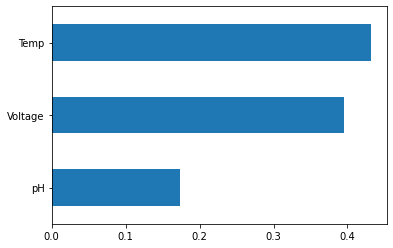

In [ ]:
# feature_scores.reverse()
# plt.barh(feature_scores)
feature_scores.plot.barh()

# Classifier 모델링 함수

### 기본 모델링 함수

- 하이퍼파라미터 튜닝 없이 모델을 학습하고 성능을 평가하는 함수
- 함수는 파라미터로 알고리즘 종류, 독립변수와 종속변수의 훈련 데이터, 검증 데이터를 각각 전달받는다

In [21]:
def modeling_uncustomized (algorithm, train_input, train_target, val_input, val_target):
    # 하이퍼파라미터 조정 없이 모델 학습
    uncustomized = algorithm(random_state=42)
    uncustomized.fit(train_input, train_target)
    # Train Data 설명력
    train_score_before = uncustomized.score(train_input, train_target).round(5)
    print(f"훈련 데이터셋 정확도: {train_score_before}")
    # Val Data 설명력
    val_score_before = uncustomized.score(val_input, val_target).round(5)
    print(f"검증 데이터셋 정확도: {val_score_before}")
    return train_score_before, val_score_before

### 하이퍼파라미터별 모델 성능 시각화 함수

- 하이퍼파라미터 튜닝에 따라 달라지는 모델 성능의 추이를 시각화하는 함수
- x축 : 하이퍼파라미터 값
- y축 : 학습 및 검증 데이터 기반의 모델 정확도

In [22]:
def optimi_visualization(algorithm_name, x_values, train_score, val_score, xlabel, filename):
    # 하이퍼파라미터 조정에 따른 훈련 데이터셋 기반 모델 성능 추이 시각화
    plt.plot(x_values, train_score, linestyle = '-', label = 'train score')
    # 하이퍼파라미터 조정에 따른 검증 데이터셋 기반 모델 성능 추이 시각화
    plt.plot(x_values, val_score, linestyle = '--', label = 'val score')
    plt.ylabel('Accuracy(%)') # y축 라벨
    plt.xlabel(xlabel) # x축 라벨
    plt.legend() # 범례표시
    plt.savefig('./figure/' + algorithm_name + '_' + filename + '.png') # 시각화한 그래프는 로컬에 저장

### 모델 최적화 함수 : 학습할 트리 모델 개수 선정

- 최적의 트리 개수 결정하는 함수
- 파라미터로 입력받은 트리 개수의 최솟값부터 5개씩 최대 트리 개수까지 늘려가며 모델 성능 평가
- 앞서 작성한 시각화 함수를 호출하여 하이퍼파라미터에 따른 모델 성능 변화 추이를 시각화

In [23]:
def optimi_estimator(algorithm, algorithm_name, train_input, train_target, val_input, val_target, n_estimator_min, n_estimator_max):
    train_score = []; val_score =[]
    para_n_tree = [n_tree*5 for n_tree in range(n_estimator_min, n_estimator_max)]

    for v_n_estimators in para_n_tree:
        model = algorithm(n_estimators = v_n_estimators, random_state=42)
        model.fit(train_input, train_target)
        train_score.append(model.score(train_input, train_target))
        val_score.append(model.score(val_input, val_target))

    # 트리 개수에 따른 모델 성능 저장
    df_score_n = pd.DataFrame({'n_estimators': para_n_tree, 'TrainScore': train_score, 'ValScore': val_score})
    # 트리 개수에 따른 모델 성능 추이 시각화 함수 호출
    optimi_visualization(algorithm_name, para_n_tree, train_score, val_score, "The number of estimator", "n_estimator")
    print(round(df_score_n, 4))

### 모델 최적화 함수 : 최대 깊이 선정

- 트리별 최대 깊이 결정하는 함수
- 파라미터로 입력받은 최대 깊이의 최솟값부터 1씩 최대 깊이의 최댓값까지 늘려가며 모델 성능 평가
- 앞서 작성한 시각화 함수를 호출하여 하이퍼파라미터에 따른 모델 성능 변화 추이를 시각화

In [24]:
def optimi_maxdepth (algorithm, algorithm_name, train_input, train_target, val_input, val_target, depth_min, depth_max, n_estimator):
    train_score = []; val_score = []
    para_depth = [depth for depth in range(depth_min, depth_max)]

    for v_max_depth in para_depth:
        # 의사결정나무 모델의 경우 트리 개수를 따로 설정하지 않기 때문에 RFC, GBC와 분리하여 모델링
        if algorithm == DTC:
            model = algorithm(max_depth = v_max_depth,
                              random_state=42)
        else:
            model = algorithm(max_depth = v_max_depth,
                              n_estimators = n_estimator,
                              random_state=42)
        
        model.fit(train_input, train_target)
        train_score.append(model.score(train_input, train_target))
        val_score.append(model.score(val_input, val_target))

    # 최대 깊이에 따른 모델 성능 저장
    df_score_n = pd.DataFrame({'depth': para_depth, 'TrainScore': train_score, 'ValScore': val_score})
    # 최대 깊이에 따른 모델 성능 추이 시각화 함수 호출
    optimi_visualization(algorithm_name, para_depth, train_score, val_score, "The number of depth", "n_depth")
    print(round(df_score_n, 4))

### 모델 최적화 함수 : 분리 노드의 최소 자료 수 선정

- 노드 분리하기 위한 최소 자료 수 결정하는 함수
- 파라미터로 입력받은 최소 자료 수의 최솟값부터 깊이를 2씩 최소 자료 수의 최댓값까지 늘려가며 모델 성능 평가
- 앞서 작성한 시각화 함수를 호출하여 하이퍼파라미터에 따른 모델 성능 변화 추이를 시각화

In [25]:
def optimi_minsplit (algorithm, algorithm_name, train_input, train_target, val_input, val_target, n_split_min, n_split_max, n_estimator, n_depth):
    train_score = []; val_score = []
    para_split = [n_split*2 for n_split in range(n_split_min, n_split_max)]
    for v_min_samples_split in para_split:
        # 의사결정나무 모델의 경우 트리 개수를 따로 설정하지 않기 때문에 RFC, GBC와 분리하여 모델링
        if algorithm == DTC:
            model = algorithm(min_samples_split = v_min_samples_split,
                              max_depth = n_depth,
                              random_state = 42)
        else:
            model = algorithm(min_samples_split = v_min_samples_split,
                              n_estimators = n_estimator,
                              max_depth = n_depth,
                              random_state = 42)
        model.fit(train_input, train_target)
        train_score.append(model.score(train_input, train_target))
        val_score.append(model.score(val_input, val_target))

    # 분리 노드의 최소 자료 수에 따른 모델 성능 저장
    df_score_n = pd.DataFrame({'min_samples_split': para_split, 'TrainScore': train_score, 'ValScore': val_score})
    # 분리 노드의 최소 자료 수에 따른 모델 성능 추이 시각화 함수 호출
    optimi_visualization(algorithm_name, para_split, train_score, val_score, "The minimum number of samples required to split an internal node", "min_samples_split")
    print(round(df_score_n, 4))

### 모델 최적화 함수 : 잎사귀 노드의 최소 자료 수 선정

- 잎사귀 노드 내 최소 자료 수 결정하는 함수
- 파라미터로 입력받은 최소 자료 수의 최솟값부터 깊이를 2씩 최소 자료 수의 최댓값까지 늘려가며 모델 성능 평가
- 앞서 작성한 시각화 함수를 호출하여 하이퍼파라미터에 따른 모델 성능 변화 추이를 시각화

In [26]:
def optimi_minleaf(algorithm, algorithm_name, train_input, train_target, val_input, val_target, n_leaf_min, n_leaf_max, n_estimator, n_depth, n_split):
    train_score = []; val_score = []
    para_leaf = [n_leaf*2 for n_leaf in range(n_leaf_min, n_leaf_max)]

    for v_min_samples_leaf in para_leaf:
        # 의사결정나무 모델의 경우 트리 개수를 따로 설정하지 않기 때문에 RFC, GBC와 분리하여 모델링
        if algorithm == DTC:
            model = algorithm(min_samples_leaf = v_min_samples_leaf,
                                        max_depth = n_depth,
                                        min_samples_split = n_split,
                                        random_state=42)
        else:
            model = algorithm(min_samples_leaf = v_min_samples_leaf,
                                n_estimators = n_estimator,
                                max_depth = n_depth,
                                min_samples_split = n_split,
                                random_state=42)
        model.fit(train_input, train_target)
        train_score.append(model.score(train_input, train_target))
        val_score.append(model.score(val_input, val_target))

    # 잎사귀 노드의 최소 자료 수에 따른 모델 성능 저장
    df_score_n = pd.DataFrame({'min_samples_leaf': para_leaf, 'TrainScore': train_score, 'ValScore': val_score})
    # 잎사귀 노드의 최소 자료 수에 따른 모델 성능 추이 시각화 함수 호출
    optimi_visualization(algorithm_name, para_leaf, train_score, val_score, "The minimum number of samples required to be at a leaf node", "min_samples_leaf")
    print(round(df_score_n, 4))

### 최종 모델 학습

- 앞서 구한 최적의 하이퍼파라미터를 적용하여 최종 모델 학습
- 최종 모델 pickle 모듈로 저장
- 모델 성능 평가 지표로서 Accuracy, Precision, Recall, F1 스코어, Confusion Matrix를 활용
- Feature Importance 산출 후 시각화

In [27]:
def model_final(algorithm, algorithm_name, feature_name, train_input, train_target, val_input, val_target, test_input, 
                test_target, n_estimator, n_depth, n_split, n_leaf):
    # 의사결정나무 모델의 경우 트리 개수를 따로 설정하지 않기 때문에 RFC, GBC와 분리하여 모델링
    if algorithm == DTC:
        model = algorithm(random_state=42, 
                          min_samples_leaf = n_leaf,
                          min_samples_split = n_split, 
                          max_depth = n_depth)
    else:
        print("RFC Start >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>")
        model = algorithm(random_state = 42, 
                          n_estimators = n_estimator, 
                          min_samples_leaf = n_leaf,
                          min_samples_split = n_split, 
                          max_depth = n_depth)
    # 모델 학습
    model.fit(train_input, train_target)
    # 모델 저장
    model_path = './model/'
    model_filename = 'chro_' + algorithm_name + '.pkl'
    with open(model_path + model_filename, 'wb') as f:
        pickle.dump(model, f)
    print(f"최종 모델 저장 완료! 파일 경로: {model_path + model_filename}\n")
    
    # 최종 모델의 성능 평가
    train_acc = model.score(train_input, train_target)
    val_acc = model.score(val_input, val_target)
    y_pred = model.predict(test_input)
    print(f"train_acc: {train_acc:.3f}") # 정확도
    print(f"Accuracy: {accuracy_score(test_target, y_pred):.3f}") # 정확도
    print(f"Precision: {precision_score(test_target, y_pred):.3f}") # 정밀도
    print(f"Recall: {recall_score(test_target, y_pred):.3f}") # 재현율
    print(f"F1-score: {f1_score(test_target, y_pred):.3f}") # F1 스코어
    
    # 혼동행렬 시각화
    plt.figure(figsize =(30, 30))
    plot_confusion_matrix(model, 
                         test_input,test_target,
                         include_values = True,
                         display_labels = ['0', '1'], # 종속변수 이름
                         cmap = 'Pastel1') # 컬러맵
    plt.savefig('./figure/' + algorithm_name + '_confusion_matrix.png') # 혼동행렬 자료 저장
    plt.show()
    
    # 변수 중요도 산출
    dt_importance = pd.DataFrame()
    dt_importance['Feature'] = feature_name # 독립변수 이름
    dt_importance['Importance'] = model.feature_importances_ # 독립변수 중요도 산출

    # 변수 중요도 내림차순 정렬
    dt_importance.sort_values("Importance", ascending = False, inplace = True)
    print(dt_importance.round(3))
    # 변수 중요도 오름차순 정렬
    dt_importance.sort_values("Importance", ascending = True, inplace = True)
    # 변수 중요도 시각화
    coordinates = range(len(dt_importance)) # 독립변수 개수만큼 bar 시각화
    plt.barh(y = coordinates, width = dt_importance["Importance"])
    plt.yticks(coordinates, dt_importance["Feature"]) # y축 눈금별 독립변수 이름 기입
    plt.xlabel("Feature Importance") # x축 이름
    plt.ylabel("Features") # y축 이름
    plt.savefig('./figure/' + algorithm_name + '_feature_importance.png') # 변수 중요도 그래프 저장

## Random Forest Classifier 기반 분류 모델 성능 평가

In [29]:
# 랜덤포레스트 분류 알고리즘
# Random Forest Classifier를 RFC로 치환
algorithm = RFC
algorithm_name = 'rfc'

### 기본 모델 학습

In [28]:
train_acc_before, val_acc_before = modeling_uncustomized(algorithm, 
                                                          train_input,
                                                          train_target,
                                                          val_input,
                                                          val_target)

# 학습 데이터셋 정확도가 1.0인 것으로 미루어 보아 과대적합 발생 예상
# 하이퍼파라미터 튜닝 필요               
# 기본 모델에서 정확도 좋게 나왔다 소수점 4자리로 했을 때 0.9999, 소수점 3자리가 정석                                       

NameError: name 'algorithm' is not defined

## 튜닝(1)

### 모델 최적화(1) : 학습할 트리 개수 선정

    n_estimators  TrainScore  ValScore
0              5      0.9964    0.9856
1             10      0.9984    0.9858
2             15      0.9983    0.9867
3             20      0.9986    0.9867
4             25      0.9985    0.9867
5             30      0.9993    0.9870
6             35      0.9989    0.9870
7             40      0.9995    0.9870
8             45      0.9995    0.9870
9             50      0.9996    0.9870
10            55      0.9995    0.9871
11            60      0.9998    0.9870
12            65      0.9998    0.9871
13            70      0.9998    0.9871
14            75      0.9998    0.9871
15            80      0.9999    0.9871
16            85      0.9998    0.9871
17            90      0.9999    0.9871
18            95      0.9999    0.9871
19           100      0.9999    0.9871
20           105      0.9999    0.9871
21           110      0.9999    0.9871
22           115      0.9999    0.9871
23           120      0.9999    0.9871
24           125      0.9

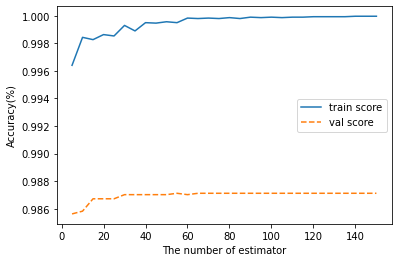

In [40]:
n_estimator_min = 1
n_estimator_max = 31
optimi_estimator(algorithm, algorithm_name, 
                 train_input, train_target, test_input, test_target, 
                 n_estimator_min, n_estimator_max)
# 트리 개수가 많고, 훈련 정확도와 검증 정확도의 차이가 적은 값으로 선정하는 것이 좋다
# 데이터프레임과 그래프를 본 결과
# 검증 정확도가 2번째로 높고, 훈련·검증 차이가 가장 적은 35개
# 검증 정확도가 가장 높고, 훈련·검증 차이가 2번째로 적은 55개
# 80, 140
# 위 2가지 경우의 수로 진행

In [31]:
# 1. 트리 개수 35개
n_estimator = 35

### 모델 최적화(2) : 최대 깊이

    depth  TrainScore  ValScore
0       1      0.9877    0.9879
1       2      0.9877    0.9879
2       3      0.9877    0.9879
3       4      0.9877    0.9879
4       5      0.9878    0.9879
5       6      0.9879    0.9879
6       7      0.9879    0.9878
7       8      0.9880    0.9878
8       9      0.9882    0.9878
9      10      0.9883    0.9878
10     11      0.9885    0.9878
11     12      0.9886    0.9876
12     13      0.9887    0.9877
13     14      0.9889    0.9877
14     15      0.9893    0.9877
15     16      0.9898    0.9878
16     17      0.9908    0.9878
17     18      0.9917    0.9877
18     19      0.9928    0.9878
19     20      0.9946    0.9877


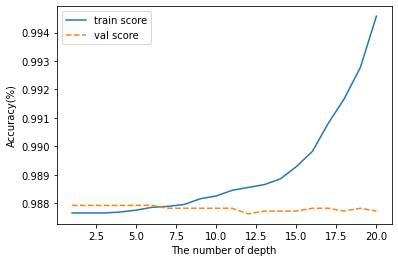

In [42]:
depth_min = 1
depth_max = 21
optimi_maxdepth(algorithm, algorithm_name, 
                train_input, train_target, val_input, val_target, 
                depth_min, depth_max, n_estimator)
# 최대 깊이는 적고 훈련 정확도와 검증 정확도의 차이가 적은 값으로 선정하는 것이 좋다
# 깊이가 깊어질수록 과대적합이 일어나기 때문에 과소적합과 과대적합이 일어나지 않는 시점인 6으로 결정 

    depth  TrainScore  ValScore
0       1      0.9877    0.9879
1       2      0.9877    0.9879
2       3      0.9877    0.9879
3       4      0.9877    0.9879
4       5      0.9878    0.9879
5       6      0.9879    0.9879
6       7      0.9879    0.9878
7       8      0.9880    0.9878
8       9      0.9882    0.9878
9      10      0.9883    0.9878
10     11      0.9885    0.9878
11     12      0.9886    0.9876
12     13      0.9887    0.9877
13     14      0.9889    0.9877
14     15      0.9893    0.9877
15     16      0.9898    0.9878
16     17      0.9908    0.9878
17     18      0.9917    0.9877
18     19      0.9928    0.9878
19     20      0.9946    0.9877
20     21      0.9955    0.9877
21     22      0.9962    0.9877
22     23      0.9967    0.9878
23     24      0.9978    0.9878
24     25      0.9982    0.9877
25     26      0.9986    0.9878
26     27      0.9986    0.9878
27     28      0.9987    0.9878
28     29      0.9988    0.9878
29     30      0.9989    0.9878
30     3

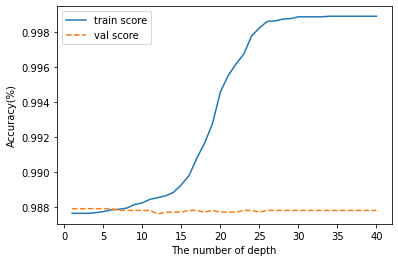

In [46]:
depth_min = 1
depth_max = 41
optimi_maxdepth(algorithm, algorithm_name, 
                train_input, train_target, val_input, val_target, 
                depth_min, depth_max, n_estimator)

In [32]:
n_depth = 6

### 모델 최적화(3) : 분리 노드의 최소 자료 수

    min_samples_split  TrainScore  ValScore
0                   2      0.9879    0.9879
1                   4      0.9878    0.9879
2                   6      0.9877    0.9879
3                   8      0.9877    0.9879
4                  10      0.9877    0.9879
5                  12      0.9877    0.9879
6                  14      0.9877    0.9879
7                  16      0.9877    0.9879
8                  18      0.9877    0.9879
9                  20      0.9877    0.9879
10                 22      0.9877    0.9879
11                 24      0.9877    0.9879
12                 26      0.9877    0.9879
13                 28      0.9877    0.9879
14                 30      0.9877    0.9879
15                 32      0.9877    0.9879
16                 34      0.9877    0.9879
17                 36      0.9877    0.9879
18                 38      0.9877    0.9879
19                 40      0.9877    0.9879
20                 42      0.9877    0.9879
21                 44      0.987

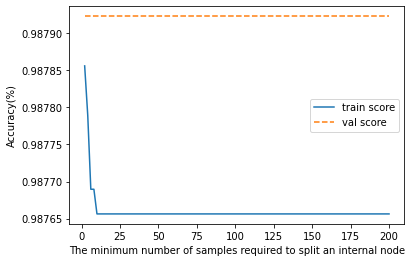

In [48]:
# depth = 6
n_split_min = 1
n_split_max = 101
# 데이터프레임 행 최대 100개까지 반드시 출력
pd.set_option('display.max_row', 100)
optimi_minsplit (algorithm, algorithm_name,
                 train_input, train_target, val_input, val_target,
                 n_split_min, n_split_max, n_estimator, n_depth)
# 분리 노드 최소 자료 수는 많고, 훈련 정확도와 검증 정확도 차이가 적은 값으로 선정하는 것이 좋다

    min_samples_split  TrainScore  ValScore
0                   2      0.9879    0.9878
1                   4      0.9879    0.9878
2                   6      0.9878    0.9878
3                   8      0.9877    0.9879
4                  10      0.9877    0.9879
5                  12      0.9877    0.9879
6                  14      0.9877    0.9879
7                  16      0.9877    0.9879
8                  18      0.9877    0.9879
9                  20      0.9877    0.9879
10                 22      0.9877    0.9879
11                 24      0.9877    0.9879
12                 26      0.9877    0.9879
13                 28      0.9877    0.9879
14                 30      0.9877    0.9879
15                 32      0.9877    0.9879
16                 34      0.9877    0.9879
17                 36      0.9877    0.9879
18                 38      0.9877    0.9879
19                 40      0.9877    0.9879
20                 42      0.9877    0.9879
21                 44      0.987

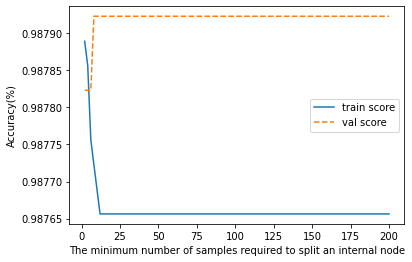

In [50]:
# depth = 7
n_split_min = 1
n_split_max = 101
# 데이터프레임 행 최대 100개까지 반드시 출력
pd.set_option('display.max_row', 100)
optimi_minsplit (algorithm, algorithm_name,
                 train_input, train_target, val_input, val_target,
                 n_split_min, n_split_max, n_estimator, n_depth)
# 6으로 진행

    min_samples_split  TrainScore  ValScore
0                   2      0.9880    0.9878
1                   4      0.9879    0.9878
2                   6      0.9878    0.9878
3                   8      0.9878    0.9879
4                  10      0.9878    0.9879
5                  12      0.9877    0.9879
6                  14      0.9877    0.9879
7                  16      0.9877    0.9879
8                  18      0.9877    0.9879
9                  20      0.9877    0.9879
10                 22      0.9877    0.9879
11                 24      0.9877    0.9879
12                 26      0.9877    0.9879
13                 28      0.9877    0.9879
14                 30      0.9877    0.9879
15                 32      0.9877    0.9879
16                 34      0.9877    0.9879
17                 36      0.9877    0.9879
18                 38      0.9877    0.9879
19                 40      0.9877    0.9879
20                 42      0.9877    0.9879
21                 44      0.987

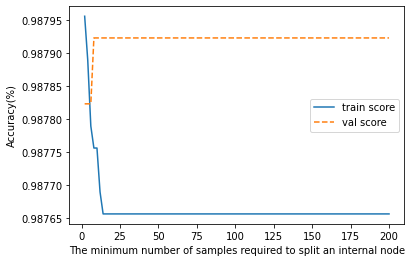

In [53]:
# depth = 8
n_split_min = 1
n_split_max = 101
# 데이터프레임 행 최대 100개까지 반드시 출력
pd.set_option('display.max_row', 100)
optimi_minsplit (algorithm, algorithm_name,
                 train_input, train_target, val_input, val_target,
                 n_split_min, n_split_max, n_estimator, n_depth)

In [33]:

n_split = 6

### 모델 최적화(4) : 잎사귀 노드의 최소 자료 수

    min_samples_leaf  TrainScore  ValScore
0                  2      0.9878    0.9878
1                  4      0.9877    0.9879
2                  6      0.9877    0.9879
3                  8      0.9877    0.9879
4                 10      0.9877    0.9879
5                 12      0.9877    0.9879
6                 14      0.9877    0.9879
7                 16      0.9877    0.9879
8                 18      0.9877    0.9879
9                 20      0.9877    0.9879
10                22      0.9877    0.9879
11                24      0.9877    0.9879
12                26      0.9877    0.9879
13                28      0.9877    0.9879
14                30      0.9877    0.9879
15                32      0.9877    0.9879
16                34      0.9877    0.9879
17                36      0.9877    0.9879
18                38      0.9877    0.9879
19                40      0.9877    0.9879
20                42      0.9877    0.9879
21                44      0.9877    0.9879
22         

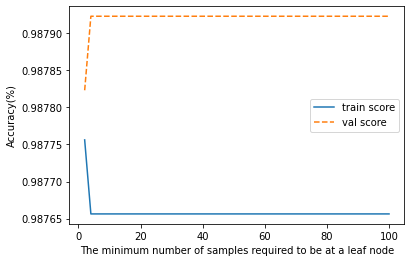

In [69]:
# n_split = 6
n_leaf_min = 1
n_leaf_max = 51
optimi_minleaf(algorithm, algorithm_name, 
               train_input, train_target, val_input, val_target, 
               n_leaf_min, n_leaf_max, n_estimator, n_depth, n_split)
# 잎사귀 노드의 최소 자료 수는 많고, 훈련 정확도와 검증 정확도의 차이가 적은 값으로 선정하는 것이 좋다
# 잎사귀 노드의 최소 자료 수가 많아질 수록 과소적합이 일어나므로 훈련·검증 정확도 차이가 나지 않는 n_leaf = 2로 선정

    min_samples_leaf  TrainScore  ValScore
0                  2      0.9877    0.9879
1                  4      0.9877    0.9879
2                  6      0.9877    0.9879
3                  8      0.9877    0.9879
4                 10      0.9877    0.9879
5                 12      0.9877    0.9879
6                 14      0.9877    0.9879
7                 16      0.9877    0.9879
8                 18      0.9877    0.9879
9                 20      0.9877    0.9879
10                22      0.9877    0.9879
11                24      0.9877    0.9879
12                26      0.9877    0.9879
13                28      0.9877    0.9879
14                30      0.9877    0.9879
15                32      0.9877    0.9879
16                34      0.9877    0.9879
17                36      0.9877    0.9879
18                38      0.9877    0.9879
19                40      0.9877    0.9879
20                42      0.9877    0.9879
21                44      0.9877    0.9879
22         

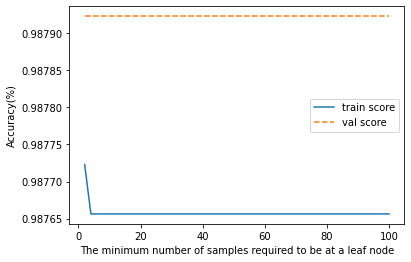

In [67]:
# n_split = 5
n_leaf_min = 1
n_leaf_max = 51
optimi_minleaf(algorithm, algorithm_name, 
               train_input, train_target, val_input, val_target, 
               n_leaf_min, n_leaf_max, n_estimator, n_depth, n_split)

    min_samples_leaf  TrainScore  ValScore
0                  2      0.9878    0.9878
1                  4      0.9877    0.9879
2                  6      0.9877    0.9879
3                  8      0.9877    0.9879
4                 10      0.9877    0.9879
5                 12      0.9877    0.9879
6                 14      0.9877    0.9879
7                 16      0.9877    0.9879
8                 18      0.9877    0.9879
9                 20      0.9877    0.9879
10                22      0.9877    0.9879
11                24      0.9877    0.9879
12                26      0.9877    0.9879
13                28      0.9877    0.9879
14                30      0.9877    0.9879
15                32      0.9877    0.9879
16                34      0.9877    0.9879
17                36      0.9877    0.9879
18                38      0.9877    0.9879
19                40      0.9877    0.9879
20                42      0.9877    0.9879
21                44      0.9877    0.9879
22         

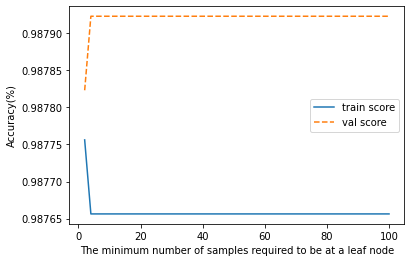

In [64]:
# n_split = 7
n_leaf_min = 1
n_leaf_max = 51
optimi_minleaf(algorithm, algorithm_name, 
               train_input, train_target, val_input, val_target, 
               n_leaf_min, n_leaf_max, n_estimator, n_depth, n_split)

In [34]:
n_leaf = 2

### 최종 모델 학습

In [49]:
cnt0 = 0
cnt1 = 0
for v in test_target :
    if v ==1 :
        cnt1 += 1
    else :
        cnt0 += 1

print(cnt0, cnt1)

129 9890


train_input =  30056
train_target =  30056
val_input =  10019
val_target =  10019
test_input =  10019
test_target =  10019
최종 모델 저장 완료! 파일 경로: ./model/chro_rfc.pkl

train_acc: 0.988
Accuracy: 0.987
Precision: 0.987
Recall: 1.000
F1-score: 0.994


<Figure size 2160x2160 with 0 Axes>

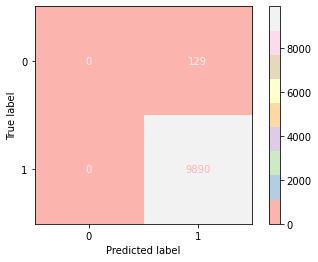

   Feature  Importance
0     Temp       0.470
1  Voltage       0.268
2       pH       0.262


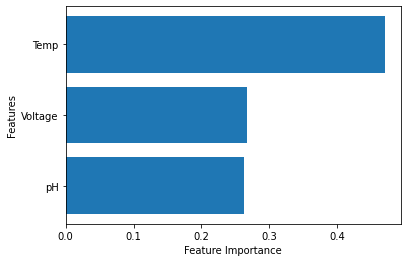

In [51]:
print("train_input = ", len(train_input))
print("train_target = ", len(train_target))
print("val_input = ", len(val_input))
print("val_target = ", len(val_target))
print("test_input = ", len(test_input))
print("test_target = ", len(test_target))

model_final(algorithm, algorithm_name, feature_name,
            train_input, train_target, val_input, val_target, test_input, test_target,
            n_estimator, n_depth, n_split, n_leaf)

## ------------------------------------------------------------------

## 튜닝(2)

### 모델 최적화(1) : 학습할 트리 개수 선정

    n_estimators  TrainScore  ValScore
0              5      0.9964    0.9856
1             10      0.9984    0.9858
2             15      0.9983    0.9867
3             20      0.9986    0.9867
4             25      0.9985    0.9867
5             30      0.9993    0.9870
6             35      0.9989    0.9870
7             40      0.9995    0.9870
8             45      0.9995    0.9870
9             50      0.9996    0.9870
10            55      0.9995    0.9871
11            60      0.9998    0.9870
12            65      0.9998    0.9871
13            70      0.9998    0.9871
14            75      0.9998    0.9871
15            80      0.9999    0.9871
16            85      0.9998    0.9871
17            90      0.9999    0.9871
18            95      0.9999    0.9871
19           100      0.9999    0.9871
20           105      0.9999    0.9871
21           110      0.9999    0.9871
22           115      0.9999    0.9871
23           120      0.9999    0.9871
24           125      0.9

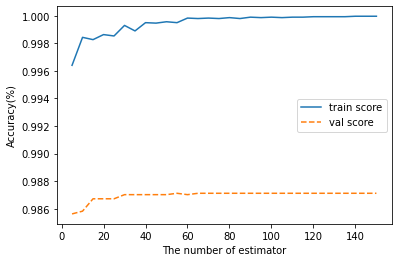

In [ ]:
# 트리 55개로 학습
n_estimator_min = 1
n_estimator_max = 31
optimi_estimator(algorithm, algorithm_name, 
                 train_input, train_target, test_input, test_target, 
                 n_estimator_min, n_estimator_max)
# 트리 개수가 많고, 훈련 정확도와 검증 정확도의 차이가 적은 값으로 선정하는 것이 좋다
# 데이터프레임과 그래프를 본 결과
# 검증 정확도가 2번째로 높고, 훈련·검증 차이가 가장 적은 35개
# 검증 정확도가 가장 높고, 훈련·검증 차이가 2번째로 적은 55개
# 80, 140
# 위 2가지 경우의 수로 진행

In [72]:
# 1. 트리 개수 35개
n_estimator = 55

### 모델 최적화(2) : 최대 깊이

    depth  TrainScore  ValScore
0       1      0.9877    0.9879
1       2      0.9877    0.9879
2       3      0.9877    0.9879
3       4      0.9877    0.9879
4       5      0.9878    0.9879
5       6      0.9879    0.9878
6       7      0.9879    0.9878
7       8      0.9880    0.9878
8       9      0.9881    0.9878
9      10      0.9882    0.9878
10     11      0.9885    0.9878
11     12      0.9886    0.9877
12     13      0.9889    0.9877
13     14      0.9890    0.9878
14     15      0.9892    0.9877
15     16      0.9897    0.9877
16     17      0.9905    0.9878
17     18      0.9913    0.9877
18     19      0.9924    0.9878
19     20      0.9938    0.9877


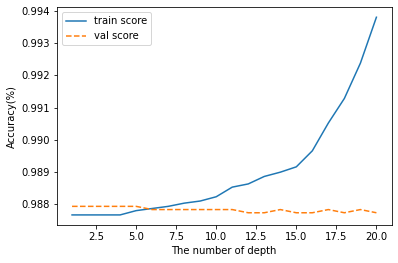

In [73]:
depth_min = 1
depth_max = 21
optimi_maxdepth(algorithm, algorithm_name, 
                train_input, train_target, val_input, val_target, 
                depth_min, depth_max, n_estimator)
# 최대 깊이는 적고 훈련 정확도와 검증 정확도의 차이가 적은 값으로 선정하는 것이 좋다
# 깊이가 깊어질수록 과대적합이 일어나기 때문에 과소적합과 과대적합이 일어나지 않는 시점인 6으로 결정 

    depth  TrainScore  ValScore
0       1      0.9877    0.9879
1       2      0.9877    0.9879
2       3      0.9877    0.9879
3       4      0.9877    0.9879
4       5      0.9878    0.9879
5       6      0.9879    0.9878
6       7      0.9879    0.9878
7       8      0.9880    0.9878
8       9      0.9881    0.9878
9      10      0.9882    0.9878
10     11      0.9885    0.9878
11     12      0.9886    0.9877
12     13      0.9889    0.9877
13     14      0.9890    0.9878
14     15      0.9892    0.9877
15     16      0.9897    0.9877
16     17      0.9905    0.9878
17     18      0.9913    0.9877
18     19      0.9924    0.9878
19     20      0.9938    0.9877
20     21      0.9956    0.9877
21     22      0.9963    0.9877
22     23      0.9972    0.9878
23     24      0.9983    0.9878
24     25      0.9987    0.9878
25     26      0.9991    0.9878
26     27      0.9991    0.9878
27     28      0.9993    0.9878
28     29      0.9994    0.9878
29     30      0.9994    0.9878
30     3

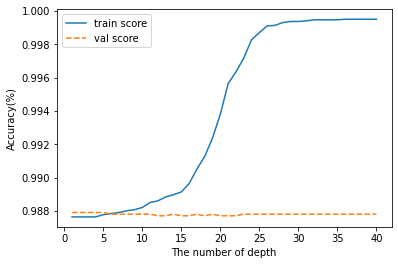

In [74]:
depth_min = 1
depth_max = 41
optimi_maxdepth(algorithm, algorithm_name, 
                train_input, train_target, val_input, val_target, 
                depth_min, depth_max, n_estimator)

In [77]:
n_depth = 7

### 모델 최적화(3) : 분리 노드의 최소 자료 수

    min_samples_split  TrainScore  ValScore
0                   2      0.9879    0.9878
1                   4      0.9878    0.9878
2                   6      0.9878    0.9879
3                   8      0.9877    0.9879
4                  10      0.9877    0.9879
5                  12      0.9877    0.9879
6                  14      0.9877    0.9879
7                  16      0.9877    0.9879
8                  18      0.9877    0.9879
9                  20      0.9877    0.9879
10                 22      0.9877    0.9879
11                 24      0.9877    0.9879
12                 26      0.9877    0.9879
13                 28      0.9877    0.9879
14                 30      0.9877    0.9879
15                 32      0.9877    0.9879
16                 34      0.9877    0.9879
17                 36      0.9877    0.9879
18                 38      0.9877    0.9879
19                 40      0.9877    0.9879
20                 42      0.9877    0.9879
21                 44      0.987

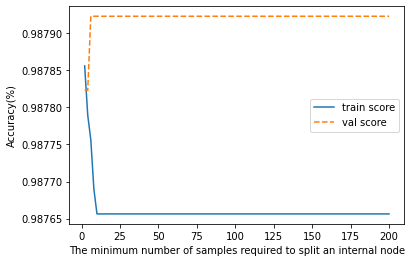

In [76]:
# depth = 6
n_split_min = 1
n_split_max = 101
# 데이터프레임 행 최대 100개까지 반드시 출력
pd.set_option('display.max_row', 100)
optimi_minsplit (algorithm, algorithm_name,
                 train_input, train_target, val_input, val_target,
                 n_split_min, n_split_max, n_estimator, n_depth)
# 분리 노드 최소 자료 수는 많고, 훈련 정확도와 검증 정확도 차이가 적은 값으로 선정하는 것이 좋다
# 과소적합이 일어나지 않는 4로 선정

    min_samples_split  TrainScore  ValScore
0                   2      0.9879    0.9878
1                   4      0.9879    0.9878
2                   6      0.9878    0.9878
3                   8      0.9878    0.9879
4                  10      0.9877    0.9879
5                  12      0.9877    0.9879
6                  14      0.9877    0.9879
7                  16      0.9877    0.9879
8                  18      0.9877    0.9879
9                  20      0.9877    0.9879
10                 22      0.9877    0.9879
11                 24      0.9877    0.9879
12                 26      0.9877    0.9879
13                 28      0.9877    0.9879
14                 30      0.9877    0.9879
15                 32      0.9877    0.9879
16                 34      0.9877    0.9879
17                 36      0.9877    0.9879
18                 38      0.9877    0.9879
19                 40      0.9877    0.9879
20                 42      0.9877    0.9879
21                 44      0.987

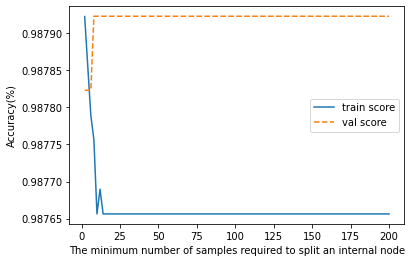

In [78]:
# depth = 7
n_split_min = 1
n_split_max = 101
# 데이터프레임 행 최대 100개까지 반드시 출력
pd.set_option('display.max_row', 100)
optimi_minsplit (algorithm, algorithm_name,
                 train_input, train_target, val_input, val_target,
                 n_split_min, n_split_max, n_estimator, n_depth)

In [79]:

n_split = 4

### 모델 최적화(4) : 잎사귀 노드의 최소 자료 수

    min_samples_leaf  TrainScore  ValScore
0                  2      0.9878    0.9878
1                  4      0.9877    0.9879
2                  6      0.9877    0.9879
3                  8      0.9877    0.9879
4                 10      0.9877    0.9879
5                 12      0.9877    0.9879
6                 14      0.9877    0.9879
7                 16      0.9877    0.9879
8                 18      0.9877    0.9879
9                 20      0.9877    0.9879
10                22      0.9877    0.9879
11                24      0.9877    0.9879
12                26      0.9877    0.9879
13                28      0.9877    0.9879
14                30      0.9877    0.9879
15                32      0.9877    0.9879
16                34      0.9877    0.9879
17                36      0.9877    0.9879
18                38      0.9877    0.9879
19                40      0.9877    0.9879
20                42      0.9877    0.9879
21                44      0.9877    0.9879
22         

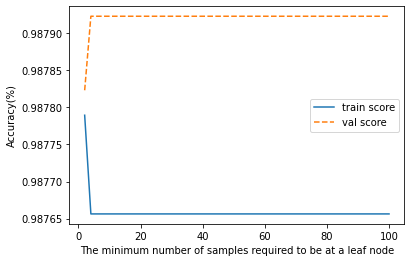

In [80]:
# n_split = 4
n_leaf_min = 1
n_leaf_max = 51
optimi_minleaf(algorithm, algorithm_name, 
               train_input, train_target, val_input, val_target, 
               n_leaf_min, n_leaf_max, n_estimator, n_depth, n_split)
# 잎사귀 노드의 최소 자료 수는 많고, 훈련 정확도와 검증 정확도의 차이가 적은 값으로 선정하는 것이 좋다
# 잎사귀 노드의 최소 자료 수가 많아질 수록 과소적합이 일어나므로 훈련·검증 정확도 차이가 나지 않는 n_leaf = 2로 선정

    min_samples_leaf  TrainScore  ValScore
0                  2      0.9878    0.9878
1                  4      0.9877    0.9879
2                  6      0.9877    0.9879
3                  8      0.9877    0.9879
4                 10      0.9877    0.9879
5                 12      0.9877    0.9879
6                 14      0.9877    0.9879
7                 16      0.9877    0.9879
8                 18      0.9877    0.9879
9                 20      0.9877    0.9879
10                22      0.9877    0.9879
11                24      0.9877    0.9879
12                26      0.9877    0.9879
13                28      0.9877    0.9879
14                30      0.9877    0.9879
15                32      0.9877    0.9879
16                34      0.9877    0.9879
17                36      0.9877    0.9879
18                38      0.9877    0.9879
19                40      0.9877    0.9879
20                42      0.9877    0.9879
21                44      0.9877    0.9879
22         

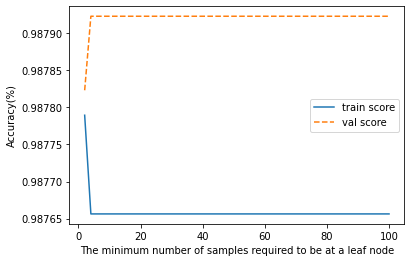

In [81]:
# n_split = 5
n_leaf_min = 1
n_leaf_max = 51
optimi_minleaf(algorithm, algorithm_name, 
               train_input, train_target, val_input, val_target, 
               n_leaf_min, n_leaf_max, n_estimator, n_depth, n_split)

In [82]:
n_leaf = 2

### 최종 모델 학습

최종 모델 저장 완료! 파일 경로: ./model/chro_rfc.pkl

Accuracy: 0.987
Precision: 0.987
Recall: 1.000
F1-score: 0.994


<Figure size 2160x2160 with 0 Axes>

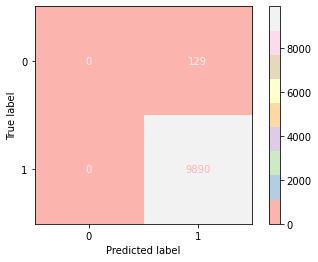

   Feature  Importance
0     Temp       0.442
1  Voltage       0.299
2       pH       0.258


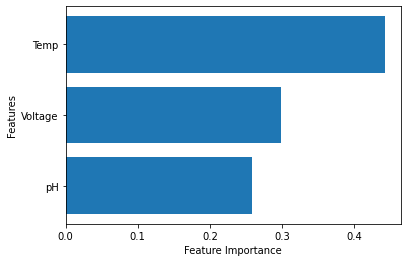

In [84]:
model_final(algorithm, algorithm_name, feature_name,
            train_input, train_target, val_input, val_target, test_input, test_target,
            n_estimator, n_depth, n_split, n_leaf)

## -----------------------------------------------------------------

## 튜닝(3)

### 모델 최적화(1) : 학습할 트리 개수 선정

    n_estimators  TrainScore  ValScore
0              5      0.9964    0.9856
1             10      0.9984    0.9858
2             15      0.9983    0.9867
3             20      0.9986    0.9867
4             25      0.9985    0.9867
5             30      0.9993    0.9870
6             35      0.9989    0.9870
7             40      0.9995    0.9870
8             45      0.9995    0.9870
9             50      0.9996    0.9870
10            55      0.9995    0.9871
11            60      0.9998    0.9870
12            65      0.9998    0.9871
13            70      0.9998    0.9871
14            75      0.9998    0.9871
15            80      0.9999    0.9871
16            85      0.9998    0.9871
17            90      0.9999    0.9871
18            95      0.9999    0.9871
19           100      0.9999    0.9871
20           105      0.9999    0.9871
21           110      0.9999    0.9871
22           115      0.9999    0.9871
23           120      0.9999    0.9871
24           125      0.9

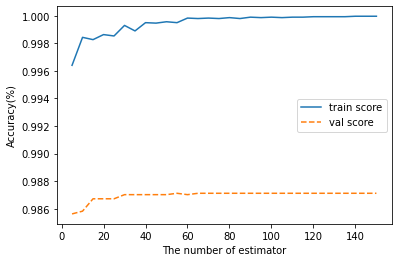

In [85]:
# 80으로 진행
n_estimator_min = 1
n_estimator_max = 31
optimi_estimator(algorithm, algorithm_name, 
                 train_input, train_target, test_input, test_target, 
                 n_estimator_min, n_estimator_max)
# 트리 개수가 많고, 훈련 정확도와 검증 정확도의 차이가 적은 값으로 선정하는 것이 좋다
# 데이터프레임과 그래프를 본 결과
# 검증 정확도가 2번째로 높고, 훈련·검증 차이가 가장 적은 35개
# 검증 정확도가 가장 높고, 훈련·검증 차이가 2번째로 적은 55개
# 80, 140
# 위 4가지 경우의 수로 진행

In [86]:
# 1. 트리 개수 35개
n_estimator = 80

### 모델 최적화(2) : 최대 깊이

    depth  TrainScore  ValScore
0       1      0.9877    0.9879
1       2      0.9877    0.9879
2       3      0.9877    0.9879
3       4      0.9877    0.9879
4       5      0.9878    0.9878
5       6      0.9879    0.9878
6       7      0.9880    0.9878
7       8      0.9881    0.9878
8       9      0.9881    0.9878
9      10      0.9883    0.9878
10     11      0.9885    0.9878
11     12      0.9886    0.9878
12     13      0.9888    0.9877
13     14      0.9889    0.9878
14     15      0.9892    0.9877
15     16      0.9896    0.9878
16     17      0.9903    0.9878
17     18      0.9910    0.9877
18     19      0.9923    0.9878
19     20      0.9933    0.9877


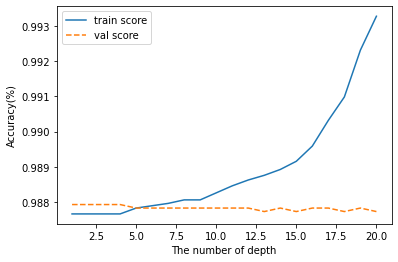

In [87]:
depth_min = 1
depth_max = 21
optimi_maxdepth(algorithm, algorithm_name, 
                train_input, train_target, val_input, val_target, 
                depth_min, depth_max, n_estimator)
# 최대 깊이는 적고 훈련 정확도와 검증 정확도의 차이가 적은 값으로 선정하는 것이 좋다
# 깊이가 깊어질수록 과대적합이 일어나기 때문에 과소적합과 과대적합이 일어나지 않는 시점인 5로 결정
# 분리노드 실행 결과 depth 6이 분리 노드 수를 많게 해줘서 6으로 진행

    depth  TrainScore  ValScore
0       1      0.9877    0.9879
1       2      0.9877    0.9879
2       3      0.9877    0.9879
3       4      0.9877    0.9879
4       5      0.9878    0.9878
5       6      0.9879    0.9878
6       7      0.9880    0.9878
7       8      0.9881    0.9878
8       9      0.9881    0.9878
9      10      0.9883    0.9878
10     11      0.9885    0.9878
11     12      0.9886    0.9878
12     13      0.9888    0.9877
13     14      0.9889    0.9878
14     15      0.9892    0.9877
15     16      0.9896    0.9878
16     17      0.9903    0.9878
17     18      0.9910    0.9877
18     19      0.9923    0.9878
19     20      0.9933    0.9877
20     21      0.9953    0.9877
21     22      0.9961    0.9877
22     23      0.9976    0.9878
23     24      0.9984    0.9878
24     25      0.9992    0.9878
25     26      0.9996    0.9878
26     27      0.9996    0.9878
27     28      0.9997    0.9878
28     29      0.9998    0.9878
29     30      0.9999    0.9878
30     3

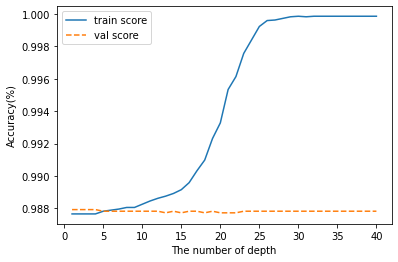

In [88]:
depth_min = 1
depth_max = 41
optimi_maxdepth(algorithm, algorithm_name, 
                train_input, train_target, val_input, val_target, 
                depth_min, depth_max, n_estimator)

In [91]:
n_depth = 6

### 모델 최적화(3) : 분리 노드의 최소 자료 수

    min_samples_split  TrainScore  ValScore
0                   2      0.9878    0.9878
1                   4      0.9878    0.9879
2                   6      0.9877    0.9879
3                   8      0.9877    0.9879
4                  10      0.9877    0.9879
5                  12      0.9877    0.9879
6                  14      0.9877    0.9879
7                  16      0.9877    0.9879
8                  18      0.9877    0.9879
9                  20      0.9877    0.9879
10                 22      0.9877    0.9879
11                 24      0.9877    0.9879
12                 26      0.9877    0.9879
13                 28      0.9877    0.9879
14                 30      0.9877    0.9879
15                 32      0.9877    0.9879
16                 34      0.9877    0.9879
17                 36      0.9877    0.9879
18                 38      0.9877    0.9879
19                 40      0.9877    0.9879
20                 42      0.9877    0.9879
21                 44      0.987

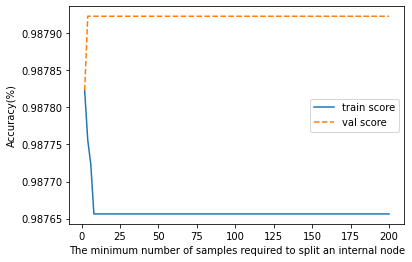

In [90]:
# depth = 5
n_split_min = 1
n_split_max = 101
# 데이터프레임 행 최대 100개까지 반드시 출력
pd.set_option('display.max_row', 100)
optimi_minsplit (algorithm, algorithm_name,
                 train_input, train_target, val_input, val_target,
                 n_split_min, n_split_max, n_estimator, n_depth)
# 분리 노드 최소 자료 수는 많고, 훈련 정확도와 검증 정확도 차이가 적은 값으로 선정하는 것이 좋다

    min_samples_split  TrainScore  ValScore
0                   2      0.9879    0.9878
1                   4      0.9878    0.9878
2                   6      0.9878    0.9879
3                   8      0.9877    0.9879
4                  10      0.9877    0.9879
5                  12      0.9877    0.9879
6                  14      0.9877    0.9879
7                  16      0.9877    0.9879
8                  18      0.9877    0.9879
9                  20      0.9877    0.9879
10                 22      0.9877    0.9879
11                 24      0.9877    0.9879
12                 26      0.9877    0.9879
13                 28      0.9877    0.9879
14                 30      0.9877    0.9879
15                 32      0.9877    0.9879
16                 34      0.9877    0.9879
17                 36      0.9877    0.9879
18                 38      0.9877    0.9879
19                 40      0.9877    0.9879
20                 42      0.9877    0.9879
21                 44      0.987

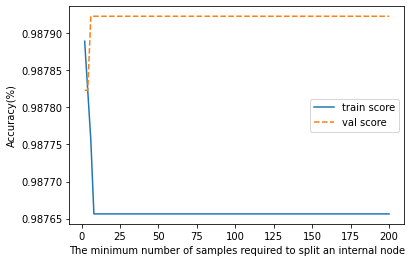

In [92]:
# depth = 6
n_split_min = 1
n_split_max = 101
# 데이터프레임 행 최대 100개까지 반드시 출력
pd.set_option('display.max_row', 100)
optimi_minsplit (algorithm, algorithm_name,
                 train_input, train_target, val_input, val_target,
                 n_split_min, n_split_max, n_estimator, n_depth)
# 4로 진행

In [98]:

n_split = 4

### 모델 최적화(4) : 잎사귀 노드의 최소 자료 수

    min_samples_leaf  TrainScore  ValScore
0                  2      0.9878    0.9878
1                  4      0.9877    0.9879
2                  6      0.9877    0.9879
3                  8      0.9877    0.9879
4                 10      0.9877    0.9879
5                 12      0.9877    0.9879
6                 14      0.9877    0.9879
7                 16      0.9877    0.9879
8                 18      0.9877    0.9879
9                 20      0.9877    0.9879
10                22      0.9877    0.9879
11                24      0.9877    0.9879
12                26      0.9877    0.9879
13                28      0.9877    0.9879
14                30      0.9877    0.9879
15                32      0.9877    0.9879
16                34      0.9877    0.9879
17                36      0.9877    0.9879
18                38      0.9877    0.9879
19                40      0.9877    0.9879
20                42      0.9877    0.9879
21                44      0.9877    0.9879
22         

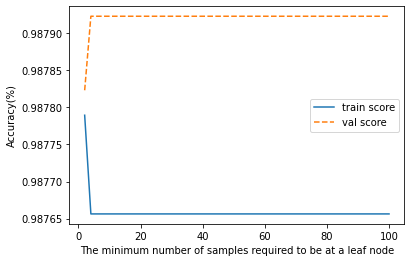

In [95]:
# n_split = 4
n_leaf_min = 1
n_leaf_max = 51
optimi_minleaf(algorithm, algorithm_name, 
               train_input, train_target, val_input, val_target, 
               n_leaf_min, n_leaf_max, n_estimator, n_depth, n_split)
# 잎사귀 노드의 최소 자료 수는 많고, 훈련 정확도와 검증 정확도의 차이가 적은 값으로 선정하는 것이 좋다
# 잎사귀 노드의 최소 자료 수가 많아질 수록 과소적합이 일어나므로 훈련·검증 정확도 차이가 나지 않는 n_leaf = 2로 선정

    min_samples_leaf  TrainScore  ValScore
0                  2      0.9878    0.9878
1                  4      0.9877    0.9879
2                  6      0.9877    0.9879
3                  8      0.9877    0.9879
4                 10      0.9877    0.9879
5                 12      0.9877    0.9879
6                 14      0.9877    0.9879
7                 16      0.9877    0.9879
8                 18      0.9877    0.9879
9                 20      0.9877    0.9879
10                22      0.9877    0.9879
11                24      0.9877    0.9879
12                26      0.9877    0.9879
13                28      0.9877    0.9879
14                30      0.9877    0.9879
15                32      0.9877    0.9879
16                34      0.9877    0.9879
17                36      0.9877    0.9879
18                38      0.9877    0.9879
19                40      0.9877    0.9879
20                42      0.9877    0.9879
21                44      0.9877    0.9879
22         

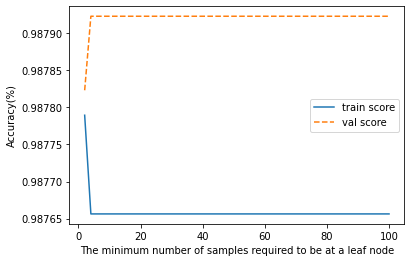

In [97]:
# n_split = 3
n_leaf_min = 1
n_leaf_max = 51
optimi_minleaf(algorithm, algorithm_name, 
               train_input, train_target, val_input, val_target, 
               n_leaf_min, n_leaf_max, n_estimator, n_depth, n_split)

In [99]:
n_leaf = 2

### 최종 모델 학습

최종 모델 저장 완료! 파일 경로: ./model/chro_rfc.pkl

Accuracy: 0.987
Precision: 0.987
Recall: 1.000
F1-score: 0.994


<Figure size 2160x2160 with 0 Axes>

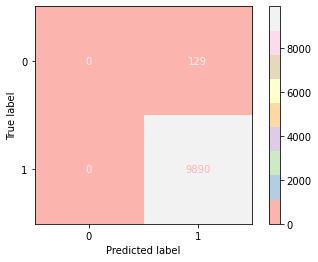

   Feature  Importance
0     Temp       0.467
1  Voltage       0.270
2       pH       0.263


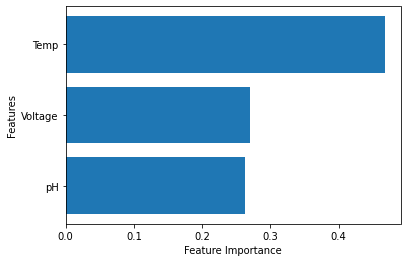

In [101]:
model_final(algorithm, algorithm_name, feature_name,
            train_input, train_target, val_input, val_target, test_input, test_target,
            n_estimator, n_depth, n_split, n_leaf)

## -------------------------------------------------------------------

## 튜닝(4)

### 모델 최적화(1) : 학습할 트리 개수 선정

    n_estimators  TrainScore  ValScore
0              5      0.9964    0.9856
1             10      0.9984    0.9858
2             15      0.9983    0.9867
3             20      0.9986    0.9867
4             25      0.9985    0.9867
5             30      0.9993    0.9870
6             35      0.9989    0.9870
7             40      0.9995    0.9870
8             45      0.9995    0.9870
9             50      0.9996    0.9870
10            55      0.9995    0.9871
11            60      0.9998    0.9870
12            65      0.9998    0.9871
13            70      0.9998    0.9871
14            75      0.9998    0.9871
15            80      0.9999    0.9871
16            85      0.9998    0.9871
17            90      0.9999    0.9871
18            95      0.9999    0.9871
19           100      0.9999    0.9871
20           105      0.9999    0.9871
21           110      0.9999    0.9871
22           115      0.9999    0.9871
23           120      0.9999    0.9871
24           125      0.9

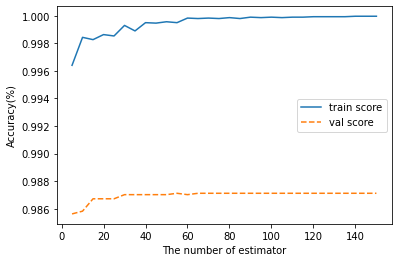

In [ ]:
# 140개로 진행
n_estimator_min = 1
n_estimator_max = 31
optimi_estimator(algorithm, algorithm_name, 
                 train_input, train_target, test_input, test_target, 
                 n_estimator_min, n_estimator_max)
# 트리 개수가 많고, 훈련 정확도와 검증 정확도의 차이가 적은 값으로 선정하는 것이 좋다
# 데이터프레임과 그래프를 본 결과
# 검증 정확도가 2번째로 높고, 훈련·검증 차이가 가장 적은 35개
# 검증 정확도가 가장 높고, 훈련·검증 차이가 2번째로 적은 55개
# 80, 140
# 위 2가지 경우의 수로 진행

In [104]:
# 1. 트리 개수 35개
n_estimator = 140

### 모델 최적화(2) : 최대 깊이

    depth  TrainScore  ValScore
0       1      0.9877    0.9879
1       2      0.9877    0.9879
2       3      0.9877    0.9879
3       4      0.9877    0.9879
4       5      0.9879    0.9879
5       6      0.9879    0.9878
6       7      0.9880    0.9878
7       8      0.9881    0.9878
8       9      0.9881    0.9878
9      10      0.9882    0.9878
10     11      0.9884    0.9878
11     12      0.9886    0.9877
12     13      0.9888    0.9877
13     14      0.9889    0.9877
14     15      0.9891    0.9877
15     16      0.9894    0.9877
16     17      0.9902    0.9877
17     18      0.9910    0.9877
18     19      0.9921    0.9877
19     20      0.9935    0.9877


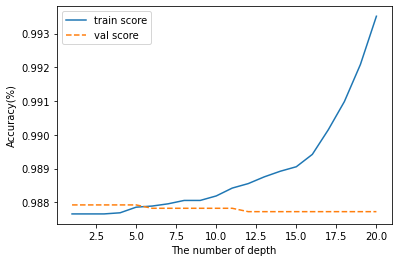

In [103]:
depth_min = 1
depth_max = 21
optimi_maxdepth(algorithm, algorithm_name, 
                train_input, train_target, val_input, val_target, 
                depth_min, depth_max, n_estimator)
# 최대 깊이는 적고 훈련 정확도와 검증 정확도의 차이가 적은 값으로 선정하는 것이 좋다
# 깊이가 깊어질수록 과대적합이 일어나기 때문에 과소적합과 과대적합이 일어나지 않는 시점인 6으로 결정
# 트리 개수가 달라져도 결과는 비슷해서 depth 24로 새로운 시도해보기

    depth  TrainScore  ValScore
0       1      0.9877    0.9879
1       2      0.9877    0.9879
2       3      0.9877    0.9879
3       4      0.9877    0.9879
4       5      0.9879    0.9879
5       6      0.9879    0.9878
6       7      0.9880    0.9878
7       8      0.9881    0.9878
8       9      0.9881    0.9878
9      10      0.9882    0.9878
10     11      0.9884    0.9878
11     12      0.9886    0.9877
12     13      0.9888    0.9877
13     14      0.9889    0.9877
14     15      0.9891    0.9877
15     16      0.9894    0.9877
16     17      0.9902    0.9877
17     18      0.9910    0.9877
18     19      0.9921    0.9877
19     20      0.9935    0.9877
20     21      0.9952    0.9877
21     22      0.9964    0.9877
22     23      0.9979    0.9877
23     24      0.9988    0.9877
24     25      0.9995    0.9877
25     26      0.9997    0.9877
26     27      0.9999    0.9877
27     28      1.0000    0.9877
28     29      1.0000    0.9877
29     30      1.0000    0.9877
30     3

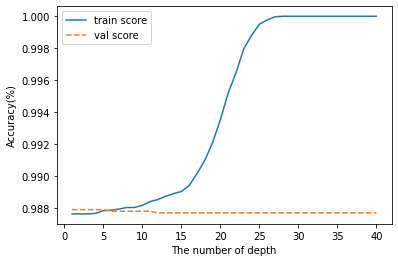

In [105]:
depth_min = 1
depth_max = 41
optimi_maxdepth(algorithm, algorithm_name, 
                train_input, train_target, val_input, val_target, 
                depth_min, depth_max, n_estimator)

In [110]:
n_depth = 24

### 모델 최적화(3) : 분리 노드의 최소 자료 수

    min_samples_split  TrainScore  ValScore
0                   2      0.9879    0.9878
1                   4      0.9878    0.9878
2                   6      0.9878    0.9879
3                   8      0.9877    0.9879
4                  10      0.9877    0.9879
5                  12      0.9877    0.9879
6                  14      0.9877    0.9879
7                  16      0.9877    0.9879
8                  18      0.9877    0.9879
9                  20      0.9877    0.9879
10                 22      0.9877    0.9879
11                 24      0.9877    0.9879
12                 26      0.9877    0.9879
13                 28      0.9877    0.9879
14                 30      0.9877    0.9879
15                 32      0.9877    0.9879
16                 34      0.9877    0.9879
17                 36      0.9877    0.9879
18                 38      0.9877    0.9879
19                 40      0.9877    0.9879
20                 42      0.9877    0.9879
21                 44      0.987

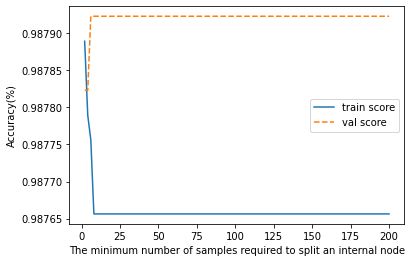

In [109]:
# depth = 6
n_split_min = 1
n_split_max = 101
# 데이터프레임 행 최대 100개까지 반드시 출력
pd.set_option('display.max_row', 100)
optimi_minsplit (algorithm, algorithm_name,
                 train_input, train_target, val_input, val_target,
                 n_split_min, n_split_max, n_estimator, n_depth)
# 분리 노드 최소 자료 수는 많고, 훈련 정확도와 검증 정확도 차이가 적은 값으로 선정하는 것이 좋다

    min_samples_split  TrainScore  ValScore
0                   2      0.9988    0.9877
1                   4      0.9896    0.9878
2                   6      0.9879    0.9878
3                   8      0.9878    0.9878
4                  10      0.9877    0.9879
5                  12      0.9877    0.9879
6                  14      0.9877    0.9879
7                  16      0.9877    0.9879
8                  18      0.9877    0.9879
9                  20      0.9877    0.9879
10                 22      0.9877    0.9879
11                 24      0.9877    0.9879
12                 26      0.9877    0.9879
13                 28      0.9877    0.9879
14                 30      0.9877    0.9879
15                 32      0.9877    0.9879
16                 34      0.9877    0.9879
17                 36      0.9877    0.9879
18                 38      0.9877    0.9879
19                 40      0.9877    0.9879
20                 42      0.9877    0.9879
21                 44      0.987

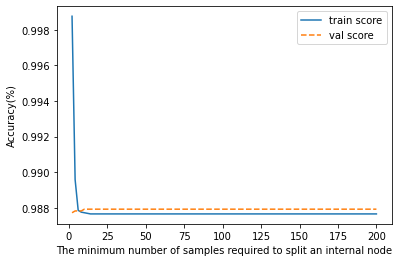

In [111]:
# depth = 24
n_split_min = 1
n_split_max = 101
# 데이터프레임 행 최대 100개까지 반드시 출력
pd.set_option('display.max_row', 100)
optimi_minsplit (algorithm, algorithm_name,
                 train_input, train_target, val_input, val_target,
                 n_split_min, n_split_max, n_estimator, n_depth)
# 8로 진행

In [114]:

n_split = 6

### 모델 최적화(4) : 잎사귀 노드의 최소 자료 수

    min_samples_leaf  TrainScore  ValScore
0                  2      0.9878    0.9879
1                  4      0.9877    0.9879
2                  6      0.9877    0.9879
3                  8      0.9877    0.9879
4                 10      0.9877    0.9879
5                 12      0.9877    0.9879
6                 14      0.9877    0.9879
7                 16      0.9877    0.9879
8                 18      0.9877    0.9879
9                 20      0.9877    0.9879
10                22      0.9877    0.9879
11                24      0.9877    0.9879
12                26      0.9877    0.9879
13                28      0.9877    0.9879
14                30      0.9877    0.9879
15                32      0.9877    0.9879
16                34      0.9877    0.9879
17                36      0.9877    0.9879
18                38      0.9877    0.9879
19                40      0.9877    0.9879
20                42      0.9877    0.9879
21                44      0.9877    0.9879
22         

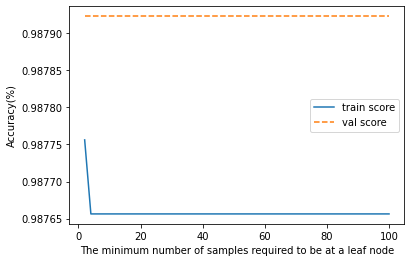

In [113]:
# n_split = 8
n_leaf_min = 1
n_leaf_max = 51
optimi_minleaf(algorithm, algorithm_name, 
               train_input, train_target, val_input, val_target, 
               n_leaf_min, n_leaf_max, n_estimator, n_depth, n_split)
# 잎사귀 노드의 최소 자료 수는 많고, 훈련 정확도와 검증 정확도의 차이가 적은 값으로 선정하는 것이 좋다
# 잎사귀 노드의 최소 자료 수가 많아질 수록 과소적합이 일어나므로 훈련·검증 정확도 차이가 나지 않는 n_leaf = 2로 선정

    min_samples_leaf  TrainScore  ValScore
0                  2      0.9878    0.9878
1                  4      0.9877    0.9879
2                  6      0.9877    0.9879
3                  8      0.9877    0.9879
4                 10      0.9877    0.9879
5                 12      0.9877    0.9879
6                 14      0.9877    0.9879
7                 16      0.9877    0.9879
8                 18      0.9877    0.9879
9                 20      0.9877    0.9879
10                22      0.9877    0.9879
11                24      0.9877    0.9879
12                26      0.9877    0.9879
13                28      0.9877    0.9879
14                30      0.9877    0.9879
15                32      0.9877    0.9879
16                34      0.9877    0.9879
17                36      0.9877    0.9879
18                38      0.9877    0.9879
19                40      0.9877    0.9879
20                42      0.9877    0.9879
21                44      0.9877    0.9879
22         

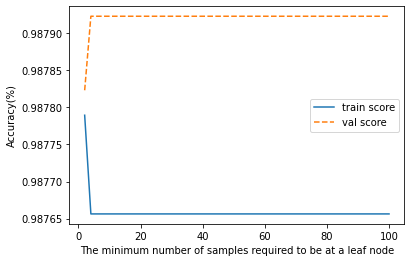

In [115]:
# n_split = 6
n_leaf_min = 1
n_leaf_max = 51
optimi_minleaf(algorithm, algorithm_name, 
               train_input, train_target, val_input, val_target, 
               n_leaf_min, n_leaf_max, n_estimator, n_depth, n_split)
# 2로 진행

In [116]:
n_leaf = 2

### 최종 모델 학습

최종 모델 저장 완료! 파일 경로: ./model/chro_rfc.pkl

Accuracy: 0.987
Precision: 0.987
Recall: 1.000
F1-score: 0.994


<Figure size 2160x2160 with 0 Axes>

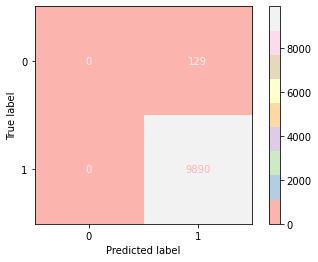

   Feature  Importance
0     Temp       0.433
1  Voltage       0.391
2       pH       0.176


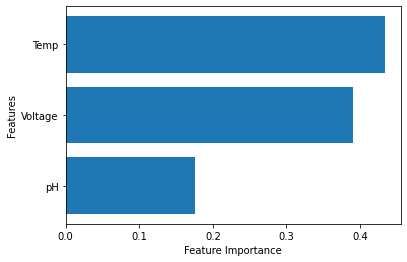

In [117]:
model_final(algorithm, algorithm_name, feature_name,
            train_input, train_target, val_input, val_target, test_input, test_target,
            n_estimator, n_depth, n_split, n_leaf)